### 知识图谱

#### 命名实体识别 (NER) Named Entity Recognition

这段代码是使用 Hugging Face Transformers 库中的 pipeline 功能进行 命名实体识别 (NER) 的一个简单示例。

它执行的任务是识别句子中具有特定意义的实体，例如人名、地点或组织。

**ner_pipeline = pipeline('ner','model' = 'dbmdz/bert-large-cased-finetuned-conll03-english')**

调用 pipeline 函数创建了一个 命名实体识别 (NER) 的管道。

第一个参数 "ner" 指定了要执行的任务类型：Named Entity Recognition。

第二个参数 model 指定了用于执行 NER 任务的预训练模型。"dbmdz/bert-large-cased-finetuned-conll03-english" 是一个基于 BERT Large 模型，并在 CoNLL-2003 英语数据集上微调过的模型，专门用于识别英文文本中的实体。

**entities = ner_pipeline(sentence)**

将输入句子传递给初始化好的 ner_pipeline 对象。管道会自动：

将句子 分词 (tokenize)。

将分词后的结果输入到指定的 BERT 模型中进行推理。

获取模型的输出（每个词的实体类别预测）。

将结果进行 后处理，整合成一个易于理解的实体列表。

entities 变量现在是一个列表，其中包含了模型识别出的所有实体及其相关信息

**for entity in entities:**
    **print(entity)**

entity 是一个字典 (dictionary)，通常包含以下键值对：

entity: 实体标签（例如，B-PER, I-PER, B-LOC）。

PER 代表 Person (人名)

LOC 代表 Location (地点)

ORG 代表 Organization (组织)

B- (Begin) 和 I- (Inside) 用于标记一个多词实体的开始和内部。

score: 模型对该识别结果的 置信度（0 到 1 之间的浮点数）。

index: 词在句子中的索引位置。

word: 识别出的实体词（或词块）。

start 和 end: 实体词在原始句子中的字符起始和结束位置。

In [2]:
# 1. 导入必要的库和初始化 Pipeline
from transformers import pipeline

ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")

# 2. 准备输入数据并执行推理
sentence = 'Barack Obama was born in Hawaii. He was elected president in 2008.'

# entity 实体
entities = ner_pipeline(sentence)

# 打印结果
for entity in entities:
    print(entity)


{'entity': 'I-PER', 'score': 0.99890506, 'index': 1, 'word': 'Barack', 'start': 0, 'end': 6}
{'entity': 'I-PER', 'score': 0.9994746, 'index': 2, 'word': 'Obama', 'start': 7, 'end': 12}
{'entity': 'I-LOC', 'score': 0.99934536, 'index': 6, 'word': 'Hawaii', 'start': 25, 'end': 31}


#### 有向图 (Directed Graph)

这段代码的目的是将上一个任务中 命名实体识别 (NER) 管道的输出（即识别出的实体列表 entities）可视化为一个 有向图 (Directed Graph)。

它使用 NetworkX 库来构建图结构，并使用 Matplotlib 库来绘制它。

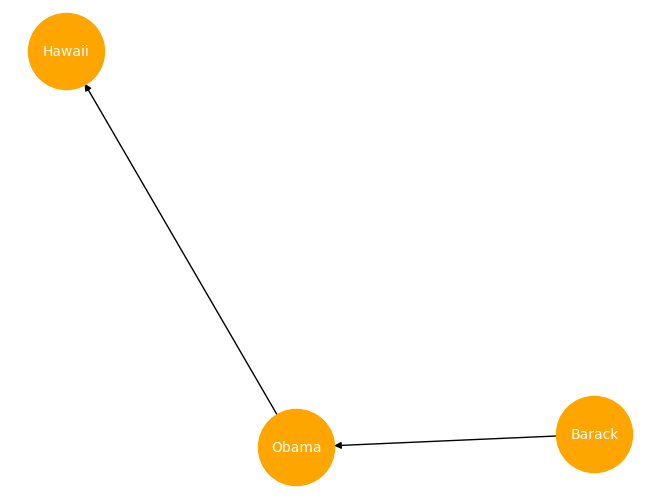

In [5]:
# 1. 导入必要的库和初始化图
import networkx as nx
import matplotlib.pyplot as plt

# 初始化一个有向图（DiGraph，Directed Graph）对象，并将其赋值给变量 G。有向图意味着图中的边具有方向性（如 A $\to$ B，而不是 A $\leftrightarrow$ B）。
G = nx.DiGraph()

# 2. 添加节点（Nodes） Add nodes
for entity in entities:
    G.add_node(entity['word'],label = entity['entity'])
    # entity 结构 {'entity': 'I-LOC', 'score': 0.99934536, 'index': 6, 'word': 'Hawaii', 'start': 25, 'end': 31}
    # entity['word']: 用实体的文本（如 "Barack"）作为节点的唯一标识符（即节点名）。
    # label=entity['entity']: 为该节点添加一个属性（attribute），属性名为 label，属性值是实体的类型（如 "I-PER"）。
    # 虽然这里设置了 label 属性，但它不会在默认的 nx.draw() 调用中显示出来。

# 3. 添加边（Edges）: 创建了一个简单的顺序图，即在实体列表中的相邻实体之间创建有向边。
for i in range(len(entities) - 1):
    G.add_edge(entities[i]['word'],entities[i+1]['word'])

# 4. 绘制图形并显示
pos = nx.spring_layout(G) # 计算节点的布局。 
# spring_layout (或称 Fruchterman-Reingold 算法) 是一种常用的力导向布局算法，它试图将节点均匀分布，使连接的节点靠近，不连接的节点推开，通常能得到较好的可视化效果。
# 结果 pos 是一个字典，存储了每个节点在二维平面上的坐标。
nx.draw(G, # 要绘制的图对象
        pos, # 使用之前计算的布局
        with_labels = True, # 在节点上显示节点的名称 (entity['word'])
        node_size = 3000,
        node_color = 'orange',
        font_size = 10,
        font_color = 'white')
# 获取边的属性标签
labels = nx.get_edge_attributes(G,'label') # 由于在添加边时没有设置边的 label 属性，这一行获取到的 labels 字典会是空的，所以它不会在图上绘制任何边的标签。
nx.draw_networkx_edge_labels(G,pos,edge_labels = labels) # 绘制边的标签。 因为 labels 变量是空的，所以实际上不会有任何标签被绘制在边上。

plt.show()

#### 闭合三角形图表的代码修改

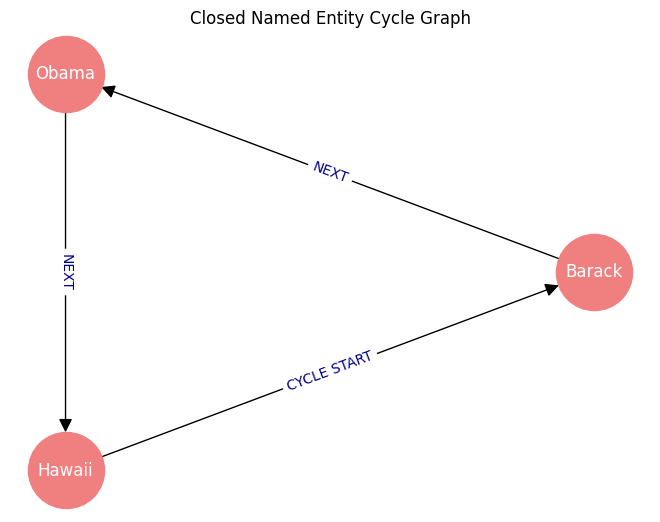

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# 示例数据（假设 entities 列表已由 NER 流程获得）
entities = [
    {'entity': 'I-PER', 'score': 0.99890506, 'index': 1, 'word': 'Barack', 'start': 0, 'end': 6},
    {'entity': 'I-PER', 'score': 0.9994746, 'index': 2, 'word': 'Obama', 'start': 7, 'end': 12},
    {'entity': 'I-LOC', 'score': 0.99934536, 'index': 6, 'word': 'Hawaii', 'start': 25, 'end': 31}
]

G = nx.DiGraph()
edge_labels_dict = {}

# 1. 添加节点 (Nodes)
for entity in entities:
    G.add_node(entity['word'], entity_type=entity['entity'])
    
# 2. 添加顺序边 (Sequential Edges)
for i in range(len(entities) - 1):
    source_word = entities[i]['word']
    target_word = entities[i+1]['word']
    
    G.add_edge(source_word, target_word)
    edge_labels_dict[(source_word, target_word)] = "NEXT"

# --- 关键修改：添加闭合边 (Closing Edge) ---
# 获取最后一个实体的词
last_word = entities[len(entities) - 1]['word'] 
# 获取第一个实体的词
first_word = entities[0]['word'] 

# 添加从最后一个实体到第一个实体的边
G.add_edge(last_word, first_word)
# 为这条闭合边设置标签
edge_labels_dict[(last_word, first_word)] = "CYCLE START" 
# --- 关键修改结束 ---


# 3. 绘制图形 (Draw the graph)
# 使用 circular_layout 让闭合的图更美观
pos = nx.circular_layout(G) 

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightcoral', font_size=12, font_color='white', arrowsize=20)

# 绘制边的标签
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_dict, font_color='darkblue', font_size=10)

plt.title("Closed Named Entity Cycle Graph")
plt.show()

#### 多语言 NER 与图结构构建

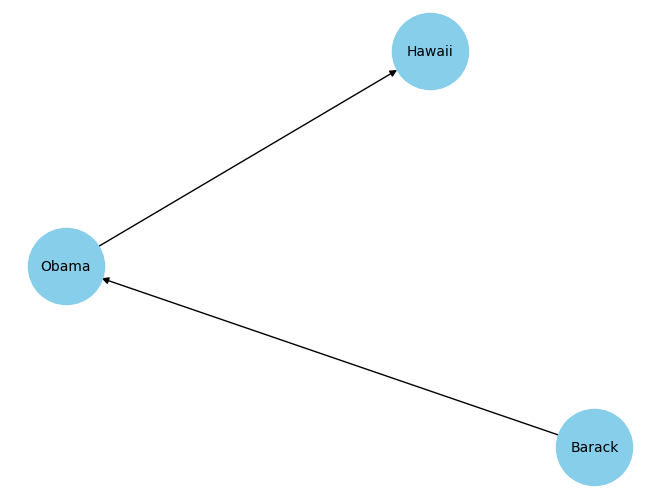

In [17]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
# 定义模型
tokenizer = AutoTokenizer.from_pretrained("Davlan/bert-base-multilingual-cased-ner-hrl")
model = AutoModelForTokenClassification.from_pretrained("Davlan/bert-base-multilingual-cased-ner-hrl")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
result = nlp(sentence)

entities = []
for res in result:
    entities.append((res['word'], res['entity']))

# Create a new graph
G = nx.DiGraph()

# Add nodes and edges
# （1，0）（2，1）
for i, entity in enumerate(entities):
    G.add_node(entity[0], label=entity[1])
    if i > 0:
        G.add_edge(entities[i-1][0], entity[0])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
plt.show()

### 中文命名体识别

#### 读取数据

In [20]:
import pandas as pd

weibo_df = pd.read_excel('weibo_data.xlsx')
data = [weibo_df.iloc[i,3] for i in range(len(weibo_df))]

data

['【】总台边上的玉渊潭，常去，但最近才知：，“玉渊”二字不一般 ：  “玉渊之中，驪龙蟠焉，颔下有珠。”金代这里修起了钓鱼台，钓鱼台国宾馆的名字便由此而来。清代乾隆皇帝不仅在此修行宫、建园林，还对玉渊潭进行开挖疏浚，调洪蓄水，把玉渊潭变成了一个有水利 \u200b',
 '玉渊潭 樱花开\u200b',
 '在玉渊潭游玩，拍到了金星伴月⭐🌙\u200b',
 '玉渊潭公园\u200b',
 '大寒玉渊潭，腊梅悄悄开。 \u200b',
 '北京玉渊潭暮色云霞。\u200b',
 '晚霞在玉渊潭公园湖中升起，照亮了湖面，点亮了电视塔\u200b',
 '玉渊潭的樱花开了～不仅有着能照见中央电视塔的绝美景致，还有春日氛围感！ \u200b',
 '玉渊潭公园日出2024.12.6\u200b',
 '【注意！近期北京玉渊潭公园“鸭出没”！】近年来，玉渊潭公园越来越好的生态环境吸引了大量野生鸟类在此越冬。初冬时节，公园东湖、西湖成为鸟类的乐园。目前园内可观测到的鸭子种类共十余种，每天都吸引了大量游客打卡拍照。园方提示游客文明观 \u200b',
 '冬至玉渊潭，风清视野阔。霞光照水，天鹅游戏，但见凫群日日来，觅食鸳鸯岸上相依偎。夕阳无限好，只是近黄昏。\u200b',
 '21年的时候玉渊潭天就出过一期视频说德堡的事情，再加上美帝历史上投毒的斑斑劣迹，美帝制造新冠病毒一点都不意外',
 '2-4月每年的固定routine！追花又是一年春光烂漫无尽诗情，一场雨一场升温都会让花期变动每日追踪花开状况，微微焦虑，又恨不得能够闪现穿梭，一日内早看玉渊潭，晚看河津樱 \u200b',
 '今天正月初十。（20240207）北京风大天冷，阳光真好。独自～主动～首次步行玉渊潭公园。记录一下。😁开心亚冬会开幕了。 \u200b',
 '今日日常：我和吒吒陪北京半日游，原本规划的玉渊潭看鸟、地安门吃糖葫芦、慈寿寺吃驴肉火烧，结果活力和梦想都被西北风冰封……在东大桥吃完驴火，三个人就被冻在三里屯mallPs：图2是包包妈妈从西班牙带回来的礼物🎁巧克力。吒吒：哥哥这个巧克力是包 \u200b',
 '北京转机的极限快闪5小时。本来还想去玉渊潭拍鸟，一落地我立刻反悔了！行李箱里所有外套都叠上了，光是吃个冰糖葫芦，手都伸不出来了😭妄想拿什么相机😭感谢星导，抱紧大腿吃了好吃的驴肉火烧！还有心心念念

#### Spacy 中文命名实体识别 (NER)

`doc.ents` 是什么？

`doc.ents` 是在使用 **spaCy** 处理文本时，`Doc` 对象的一个核心属性，它存储了模型在文本中识别到的所有**命名实体 (Named Entities)**。

简而言之，它是一个**迭代器（Iterable）**，包含了文本中所有识别出的命名实体对象。

-----

`doc.ents` 的类型

当 spaCy 的 `nlp` 模型处理一段文本后，它会返回一个 **`Doc` 对象**。`Doc` 对象本质上是一个包含所有 token（词语）及其属性（如词性、依赖关系等）的容器。

`doc.ents` 属性返回的是一个 **`Span` 对象**的**元组 (tuple)**。每个 `Span` 对象代表一个被识别出的命名实体。

`Span` 对象的关键属性

在代码中，循环遍历 `doc.ents` 得到的 `ent` 就是一个 `Span` 对象。你使用了它的两个核心属性：

| 属性 | 作用 | 对应代码中的键 | 示例值 |
| :--- | :--- | :--- | :--- |
| **`ent.text`** | 实体对应的**原始文本**。 | `"实体"` | "巴拉克·奥巴马" |
| **`ent.label_`** | 实体的**类型标签**（字符串形式）。 | `"类型"` | "PERSON" |
| `ent.start` | 实体在 `Doc` 对象中**起始 token 的索引**。 | - | 0 |
| `ent.end` | 实体在 `Doc` 对象中**结束 token 的索引**（不包含该索引）。 | - | 3 |

示例回顾

```python
for ent in doc.ents:
    entities.append({"实体": ent.text, "类型": ent.label_})
```

  * `for ent in doc.ents:` 循环遍历所有识别到的实体 Span 对象。
  * `ent.text` 提取了实体词语本身。
  * `ent.label_` 提取了实体分类结果（例如 PERSON, GPE 等）。

In [25]:
# 使用 spaCy 库进行中文命名实体识别 (NER)，并将结果保存为 JSON 文件
import spacy
import json

# 加载中文预训练模型
nlp = spacy.load("zh_core_web_md")

output = []
for line in data:
    entities = []
    doc = nlp(line) # 处理字符串
    for ent in doc.ents: # doc.ents 是一个包含所有识别到的实体对象的元组。
        entities.append({'实体':ent.text,
                         '类型':ent.label_})
    output.append(entities)

# 保存到 JSON 文件
with open('entities_output.json','w',encoding = 'utf-8') as f:
    json.dump(output, f, ensure_ascii=False, indent=4) # 写入 JSON 数据。
    # output: 要写入文件的数据（即所有文本行处理后的实体列表）。
    # f: 写入数据的目标文件对象。
    # ensure_ascii=False: 关键参数，确保 JSON 文件中的中文字符以原始形式（而不是 \uXXXX Unicode 转义字符）保存，提高了可读性。
    # indent=4: 美化输出，将 JSON 数据格式化为更易读的结构，每级缩进 4 个空格

In [34]:
output

[[{'实体': '玉渊', '类型': 'GPE'},
  {'实体': '二', '类型': 'CARDINAL'},
  {'实体': '玉渊', '类型': 'GPE'},
  {'实体': '钓鱼台', '类型': 'LOC'},
  {'实体': '钓鱼台', '类型': 'LOC'},
  {'实体': '国宾馆', '类型': 'FAC'},
  {'实体': '清代', '类型': 'DATE'},
  {'实体': '乾隆', '类型': 'PERSON'}],
 [],
 [{'实体': '金星伴月⭐🌙', '类型': 'FAC'}],
 [{'实体': '玉渊潭公园', '类型': 'FAC'}],
 [{'实体': '大寒玉', '类型': 'NORP'}],
 [{'实体': '北京', '类型': 'GPE'}],
 [{'实体': '玉渊潭公园', '类型': 'FAC'}],
 [{'实体': '中央电视塔', '类型': 'FAC'}],
 [{'实体': '玉渊潭公园', '类型': 'FAC'},
  {'实体': '12', '类型': 'CARDINAL'},
  {'实体': '6', '类型': 'CARDINAL'}],
 [{'实体': '北京玉渊潭公园', '类型': 'FAC'},
  {'实体': '东湖', '类型': 'LOC'},
  {'实体': '西湖', '类型': 'LOC'},
  {'实体': '十余', '类型': 'CARDINAL'}],
 [{'实体': '见凫群日日', '类型': 'DATE'}, {'实体': '食鸳', '类型': 'LOC'}],
 [{'实体': '21年', '类型': 'DATE'},
  {'实体': '玉渊', '类型': 'GPE'},
  {'实体': '一', '类型': 'CARDINAL'}],
 [{'实体': '4月', '类型': 'DATE'},
  {'实体': '追花', '类型': 'PERSON'},
  {'实体': '一年', '类型': 'DATE'},
  {'实体': '河津', '类型': 'GPE'}],
 [{'实体': '今天正月初十', '类型': 'DATE'},
  {'实体': '20240207

#### 绘制知识图谱

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128564 (\N{SLEEPING FACE}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


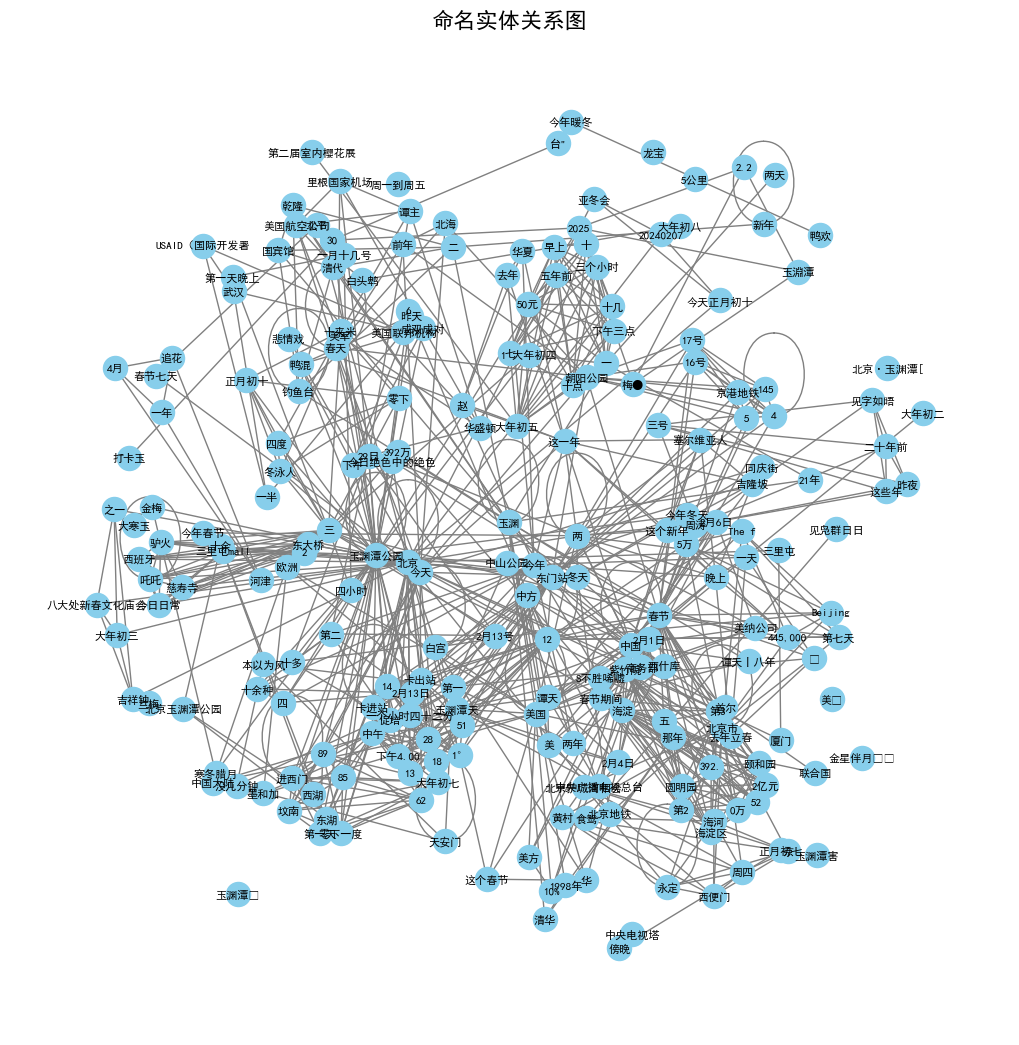

In [41]:
import matplotlib.font_manager as fm

# 指定字体路径（确保路径正确）
font_path = "SIMHEI.TTF"
my_font = fm.FontProperties(fname=font_path)

output = []

# 构建空的图
G = nx.Graph()

# 处理每条文本
for line in data:
    entities = []
    # 处理文本
    doc = nlp(line)
    for ent in doc.ents:
        entities.append(ent.text)
        # 将实体作为节点添加到图中
        if not G.has_node(ent.text):
            G.add_node(ent.text)
    
    # 为同一条文本中的实体之间添加边
    # i :[0,len(entities)-1]
    # j: [i+1,len(entities)-1]
    for i in range(len(entities)):
        for j in range(i + 1, len(entities)):
            G.add_edge(entities[i], entities[j])

# 绘制关系图
plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G, seed=42, k=0.5)  
# 使用固定种子，保持一致的布局
#增大了 k=0.5，使得节点之间的距离增大，从而减少重叠。
nx.draw(G, pos, with_labels=False, node_size=300, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')

# 手动绘制中文标签，保证字体渲染
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=8, fontproperties=my_font, ha="center", va="center")

# 设置标题并显示中文
plt.title("命名实体关系图", fontproperties=my_font, fontsize=16)
plt.show()

#### HanLP 中文 NER

HanLP ：是一个功能强大的 自然语言处理（NLP）库，专门针对中文处理优化，同时支持多种语言。它提供了 分词、词性标注、命名实体识别（NER）、依存句法分析、文本摘要、关键词提取 等丰富的功能，并且具有 轻量级、高效、可扩展 的特点。

In [ ]:
import hanlp
nlp = hanlp.load(hanlp.pretrained.ner.MSRA_NER_BERT_BASE_ZH)
for line in data:
    entities = nlp(line)
    print(entities)

#### transformers 库用于中文命名实体识别 (NER)

只能做出来直接每个汉字打散后的ner

In [33]:
from transformers import pipeline
import networkx as nx
import matplotlib.pyplot as plt

# chinese font
plt.rcParams['font.sans-serif'] = ['STHeiti']

# 载入中文命名实体识别模型
ner_pipeline = pipeline("ner",model="Davlan/bert-base-multilingual-cased-ner-hrl")#"bert-base-chinese") #model="hfl/chinese-bert-wwm")

# 提取实体
entities = []
for post in data:
    entities += ner_pipeline(post)

for entity in entities:
    print(entity)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
'(ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')), '(Request ID: 9c10efcf-2553-470d-b9e5-954024c99b2a)')' thrown while requesting HEAD https://huggingface.co/Davlan/bert-base-multilingual-cased-ner-hrl/resolve/main/config.json
Retrying in 1s [Retry 1/5].
'(ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')), '(Request ID: 8ae43ed1-58b8-466f-9788-1066dc67c243)')' thrown while requesting HEAD https://huggingface.co/Davlan/bert-base-multilingual-cased-ner-hrl/resolve/main/config.json
Retrying in 2s [Retry 2/5].


{'entity': 'B-LOC', 'score': 0.9998235, 'index': 8, 'word': '玉', 'start': 7, 'end': 8}
{'entity': 'I-LOC', 'score': 0.9998041, 'index': 9, 'word': '渊', 'start': 8, 'end': 9}
{'entity': 'I-LOC', 'score': 0.9998671, 'index': 10, 'word': '潭', 'start': 9, 'end': 10}
{'entity': 'B-LOC', 'score': 0.9995198, 'index': 23, 'word': '玉', 'start': 22, 'end': 23}
{'entity': 'I-LOC', 'score': 0.99963856, 'index': 24, 'word': '渊', 'start': 23, 'end': 24}
{'entity': 'B-LOC', 'score': 0.99807394, 'index': 33, 'word': '玉', 'start': 35, 'end': 36}
{'entity': 'I-LOC', 'score': 0.9983175, 'index': 34, 'word': '渊', 'start': 36, 'end': 37}
{'entity': 'B-ORG', 'score': 0.9995173, 'index': 60, 'word': '钓', 'start': 62, 'end': 63}
{'entity': 'I-ORG', 'score': 0.99908066, 'index': 61, 'word': '鱼', 'start': 63, 'end': 64}
{'entity': 'I-ORG', 'score': 0.99937785, 'index': 62, 'word': '台', 'start': 64, 'end': 65}
{'entity': 'I-ORG', 'score': 0.9995726, 'index': 63, 'word': '国', 'start': 65, 'end': 66}
{'entity': 'I

#### LTP

In [ ]:
from ltp import LTP

ltp = LTP()
# 提取实体
entities = []
for post in data:
    
    if not post.strip():  # 避免空字符串输入
        print("跳过空文本")
        continue  

    try:
        output = ltp.pipeline(post, tasks=["cws", "ner"])

        # 分词结果
        words = output.cws
        print("分词:", words)

        # 命名实体识别
        ner = output.ner
        print("NER 结果:", ner)

    except Exception as e:
        print(f" 处理 '{post}' 出错: {e}")


#### network

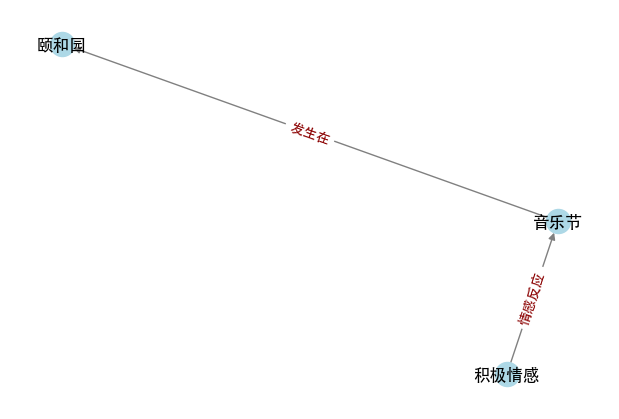

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 指定字体路径（确保路径正确）
plt.rcParams['font.sans-serif'] = ['STHeiti']

# 创建有向图
G = nx.DiGraph()

# 添加节点
G.add_node("颐和园", type="公园", color="green")
G.add_node("音乐节", type="事件", color="blue")
G.add_node("积极情感", type="情感", color="red")

# 添加关系
G.add_edge("音乐节", "颐和园", relation="发生在")
G.add_edge("积极情感", "音乐节", relation="情感反应")

# 计算布局
pos = nx.spring_layout(G)

# 绘制节点和边
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=False, node_color="lightblue", edge_color="gray")

# 1. 从图G中获取边的 'relation' 属性作为标签字典
edge_labels = nx.get_edge_attributes(G, 'relation') 

# 2. 调用 nx.draw_networkx_edge_labels 函数来绘制标签
nx.draw_networkx_edge_labels(
    G, 
    pos, 
    edge_labels=edge_labels, 
    font_color='darkred',
    font_size=10,
    # 将自定义的中文 FontProperties 应用于边的标签
    font_family='STHeiti'
)

# 手动绘制中文标签
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=12, fontproperties='STHeiti', ha="center", va="center")

plt.show()



#### 使用pyvis构建 互动式知识图谱：

In [50]:
from pyvis.network import Network

net = Network(notebook = True,font_color = 'black')

# 添加节点
net.add_node('颐和园',label = '颐和园',color = 'green')
net.add_node('音乐节',label = '音乐节',color = 'blue')
net.add_node('积极情感',label = '积极情感',color = 'red')

# 添加边
net.add_edge('音乐节','颐和园',title = '发生在')
net.add_edge('积极情感','音乐节',title = '情感反应')

# 生成 HTML
net.show('chinese_park_graph.html')

chinese_park_graph.html
